In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fastparquet import ParquetFile
import seaborn as sns
from phik import phik_matrix

In [10]:
file_path = "Data/train_ai_comp_final_dp.parquet"
pf = ParquetFile(file_path)
df = pf.to_pandas()
df.head()

,id,target,sample_ml_new,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
0,0,0,1,1761,1759,85,105469,191,46,0,...,28913,48985,84264,12045,12107,12510,21126,28913,48985,84264
1,1,0,1,1761,1759,120,105610,144,71,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,890,1759,141,105227,191,11,0,...,55949,70006,113317,33735,31242,12691,48682,55949,70006,113317
5,5,0,1,1599,966,30,102441,191,8,0,...,0,6872,8530,0,0,0,0,0,6872,8530
6,6,0,1,1761,1759,85,104006,191,2,0,...,0,0,7642,0,0,0,0,0,0,7642


In [11]:
df.shape

(519615, 1079)

<Axes: >

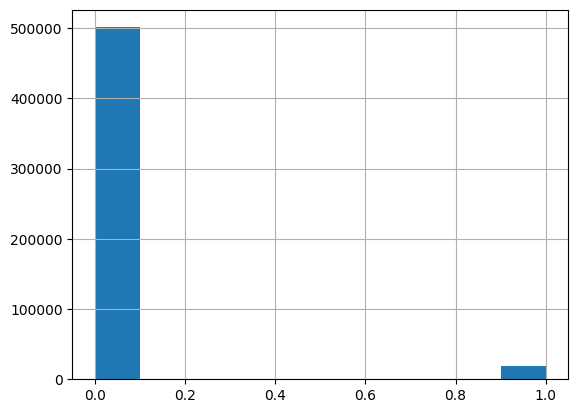

In [12]:
df.target.hist()

In [13]:
print(df[df["id"] == 6])

   id  target  sample_ml_new  feature1  feature2  feature3  feature4  \
6   6       0              1      1761      1759        85    104006   

   feature5  feature6  feature7  ...  feature1067  feature1068  feature1069  \
6       191         2         0  ...            0            0         7642   

   feature1070  feature1071  feature1072  feature1073  feature1074  \
6            0            0            0            0            0   

   feature1075  feature1076  
6            0         7642  

[1 rows x 1079 columns]


In [14]:
plt.figure(figsize = (16, 10))
timeline = df.loc[7].values.tolist()
print(timeline)

[7.0, 0.0, 1.0, 1761.0, 1759.0, 32.0, 105473.0, 191.0, 115.0, 0.0, 0.0, 3.0, 0.0, 0.0, 2.0, 191.0, 1.0, 0.0, 0.0, 0.0, 0.0, 248.0, 248.0, 347.0, 140184.0, 9.0, 248.0, 657.0, 5.0, 8.0, 9.0, 250.0, 255.0, 633.0, 1756.0, 50524.0, 40102.0, 55037.0, 3652.0, 85495.0, 3996.0, 991.0, 3950.0, 7705.0, 3156.0, 42486.0, 6511.0, 12018.0, 390445.0, 419165.0, 0.0, 0.0, 390206.0, 418198.0, 0.0, 0.0, 378923.0, 409049.0, 0.0, 0.0, 0.0, 0.0, 63.0, 833.0, 736.0, 159808.0, 2077.0, 485.0, 45.0, 3.0, 0.0, 0.0, 247.0, 26450.0, 8098.0, 123709.0, 12739.0, 25492.0, 20367.0, 103121.0, 24643.0, 18552.0, 8327.0, 2039.0, 3207.0, 2266.0, 16456.0, 756.0, 13249.0, 4625.0, 0.0, 0.0, 0.0, 2.0, 618.0, 888.0, 225559.0, 49025.0, 7130.0, 3219.0, 43624.0, 44723.0, 3590.0, 157252.0, 31385.0, 596201.0, 26102.0, 91833.0, 122263.0, 460022.0, 58698.0, 8757.0, 35612.0, 39059.0, 10467.0, 11822.0, 94931.0, 2219.0, 66897.0, 61918.0, 234148.0, 1090.0, 103856.0, 562442.0, 27281.0, 18514.0, 68351.0, 32190.0, 560909.0, 224633.0, 1319.0, 9

<Figure size 1600x1000 with 0 Axes>

In [15]:
plt.figure(figsize = (16, 10))
timeline = df.loc[46].values.tolist()
print(timeline)

[46.0, 0.0, 1.0, 1120.0, 662.0, 38.0, 104052.0, 19.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0, 187.0, 19.0, 1.0, 0.0, 0.0, 0.0, 0.0, 7.0, 7.0, 13.0, 121919.0, 9.0, 248.0, 1714.0, 5.0, 8.0, 9.0, 250.0, 1730.0, 633.0, 1756.0, 49681.0, 51753.0, 65730.0, 3652.0, 85495.0, 14172.0, 11665.0, 16298.0, 7705.0, 3156.0, 36238.0, 6511.0, 12018.0, 368095.0, 425578.0, 0.0, 0.0, 367894.0, 424565.0, 0.0, 0.0, 357069.0, 415215.0, 0.0, 0.0, 0.0, 0.0, 63.0, 833.0, 109.0, 110830.0, 2077.0, 485.0, 45.0, 3.0, 0.0, 0.0, 247.0, 26450.0, 8098.0, 123709.0, 12739.0, 25492.0, 20367.0, 103121.0, 24643.0, 18552.0, 8327.0, 2039.0, 3207.0, 2266.0, 16456.0, 756.0, 13249.0, 4625.0, 121568.0, 409.0, 115295.0, 38101.0, 618.0, 911.0, 287282.0, 37427.0, 1200.0, 3219.0, 8201.0, 42957.0, 3590.0, 42671.0, 41782.0, 359172.0, 2708.0, 7516.0, 20060.0, 446315.0, 41647.0, 6177.0, 43222.0, 30548.0, 10467.0, 13557.0, 17196.0, 5074.0, 841.0, 64535.0, 410256.0, 1117.0, 26191.0, 542761.0, 448461.0, 18514.0, 16953.0, 36524.0, 542700.0, 225201.0, 1

<Figure size 1600x1000 with 0 Axes>

In [16]:
def faeture_drop(data):
    return data.copy().loc[:, df.nunique() != 1]


final_df = faeture_drop(df)
final_df.head()

,id,target,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
0,0,0,1761,1759,85,105469,191,46,0,6,...,28913,48985,84264,12045,12107,12510,21126,28913,48985,84264
1,1,0,1761,1759,120,105610,144,71,0,135,...,0,0,0,0,0,0,0,0,0,0
2,2,0,890,1759,141,105227,191,11,0,0,...,55949,70006,113317,33735,31242,12691,48682,55949,70006,113317
5,5,0,1599,966,30,102441,191,8,0,0,...,0,6872,8530,0,0,0,0,0,6872,8530
6,6,0,1761,1759,85,104006,191,2,0,0,...,0,0,7642,0,0,0,0,0,0,7642


In [27]:
final_df

,id,target,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
0,0,0,1761,1759,85,105469,191,46,0,6,...,28913,48985,84264,12045,12107,12510,21126,28913,48985,84264
1,1,0,1761,1759,120,105610,144,71,0,135,...,0,0,0,0,0,0,0,0,0,0
2,2,0,890,1759,141,105227,191,11,0,0,...,55949,70006,113317,33735,31242,12691,48682,55949,70006,113317
5,5,0,1599,966,30,102441,191,8,0,0,...,0,6872,8530,0,0,0,0,0,6872,8530
6,6,0,1761,1759,85,104006,191,2,0,0,...,0,0,7642,0,0,0,0,0,0,7642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693036,693036,0,1761,1759,141,410,191,2,125,290,...,0,0,0,0,0,0,0,0,0,0
693038,693038,0,1761,1759,0,170,191,1,125,290,...,0,0,0,0,0,51714,0,0,0,0
693039,693039,0,1761,1759,0,168,191,1,125,290,...,0,0,0,0,0,51714,0,0,0,0
693040,693040,0,1761,1759,141,74,191,1,125,290,...,0,0,0,0,0,51714,0,0,0,0


In [28]:
randow_rows = df.sample(n = 51)

In [29]:
corr_matrix = phik_matrix(final_df.iloc[randow_rows, 2:])
sns.heatmap(corr_matrix)

MemoryError: Unable to allocate 3.82 GiB for an array with shape (986, 519615) and data type int64